In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from datasets import DatasetDict, Datasets
from transformers import AutoTokenizer, TFBertModel
import tensorflow as tf
from sklearn.model_selection import train_test_split

c:\Users\Kalea\miniconda3\envs\tf_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Preparation

In [2]:
df = pd.read_csv('../Data/STAGE 4 FINAL MERGED DATA/STAGE_4_MERGED_FINAL_ENCODED.csv')
# df = pd.read_csv('../Data/STAGE 4 FINAL MERGED DATA/STAGE_4_MERGED_FINAL_ENCODED_2_KLASIFIKASI.csv')

In [3]:
df

,klasifikasi_perkara_encoded,penuntut_umum_encoded,hakim_encoded,jumlah_saksi,maks_penjara_berdasarkan_pasal,terdakwa,summarized_dakwaan,total_pidana_penjara_bulan
0,0,0,0,6,80,GEDE DARMAYASA,Terdakwa Gede Darmayasa didakwa telah melakuka...,5.0
1,1,1,1,4,48,IDA BAGUS MADE DARMA WIGUNA,"Pada bulan Februari dan Maret 2024, terdakwa I...",24.0
2,0,0,2,6,84,HANDRI JOHANAS,"Terdakwa Handri Johanes pada Rabu, 24 April 20...",4.0
3,2,2,1,2,144,I GEDE ARIADI alias BERNAD,"Pada hari Minggu, 14 April 2024 sekitar pukul ...",14.0
4,2,3,1,2,144,I GEDE ARIADI alias BERNAD,"Pada hari Minggu, 14 April 2024 sekitar pukul ...",14.0
...,...,...,...,...,...,...,...,...
4330,2,347,128,2,240,NURUL FIQRI SUDIRMAN als KIKI bin SUDIRMAN,"Pada Jumat, 31 Maret 2023, sekitar pukul 20.30...",72.0
4331,0,361,117,2,84,SUPRIADI BIN RATIM,"Pada hari Minggu, 28 Mei 2023, sekitar pukul 1...",16.0
4332,0,363,117,2,84,SUPRIADI BIN RATIM,"Pada hari Minggu, 28 Mei 2023, sekitar pukul 1...",16.0
4333,0,361,117,2,84,ANWAR RURI BIN SYARIFUDIN USMAN,"Pada hari Minggu, 28 Mei 2023, sekitar pukul 1...",16.0


In [5]:
df_filtered = df.copy()

In [6]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   klasifikasi_perkara_encoded     4335 non-null   int64  
 1   penuntut_umum_encoded           4335 non-null   int64  
 2   hakim_encoded                   4335 non-null   int64  
 3   jumlah_saksi                    4335 non-null   int64  
 4   maks_penjara_berdasarkan_pasal  4335 non-null   int64  
 5   terdakwa                        4335 non-null   object 
 6   summarized_dakwaan              4335 non-null   object 
 7   total_pidana_penjara_bulan      4335 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 271.1+ KB


### Split Data

In [8]:
def stratified_split(df: pd.DataFrame, split_size: float = 0.8) -> tuple[pd.DataFrame, pd.DataFrame]:
    unique_groups = df.groupby(["klasifikasi_perkara_encoded", "penuntut_umum_encoded", "hakim_encoded"]).apply(lambda x: x.index.tolist()).to_dict()
    
    print(unique_groups)
    train_idx, test_idx = [], []
    
    for indices in unique_groups.values():        
        if len(indices) == 1:
            train_idx.extend(indices)
        else:
            train, test = train_test_split(indices, train_size=split_size, random_state=42)
            train_idx.extend(train)
            test_idx.extend(test)
    
    return df.loc[train_idx], df.loc[test_idx]

In [9]:
train_df, test_df = stratified_split(df_filtered)

{(0, 0, 0): [0, 20], (0, 0, 2): [2], (0, 1, 0): [19], (0, 1, 4): [35, 36], (0, 4, 1): [5], (0, 4, 3): [10], (0, 7, 1): [9], (0, 8, 0): [15, 17], (0, 9, 0): [16, 18], (0, 11, 4): [22, 23], (0, 13, 0): [32], (0, 13, 3): [34], (0, 15, 4): [33], (0, 16, 0): [37], (0, 17, 0): [38], (0, 17, 14): [440, 504, 598, 612], (0, 17, 16): [425], (0, 17, 18): [477, 668], (0, 17, 19): [787, 788, 789, 790], (0, 17, 20): [435, 441, 521, 581, 611, 728, 749], (0, 17, 21): [642, 826], (0, 18, 0): [39], (0, 19, 0): [40, 41], (0, 20, 0): [42], (0, 22, 7): [46], (0, 26, 10): [52, 54], (0, 27, 10): [137, 153, 173], (0, 27, 11): [75, 104], (0, 27, 12): [174], (0, 27, 14): [119], (0, 28, 10): [100, 148], (0, 28, 11): [55], (0, 29, 10): [56], (0, 30, 10): [57, 94], (0, 30, 12): [90], (0, 31, 9): [58], (0, 31, 10): [106, 107, 109], (0, 31, 12): [96, 97], (0, 32, 10): [59, 60, 61], (0, 32, 12): [101, 102], (0, 33, 10): [175], (0, 33, 14): [145, 163, 164, 165, 167, 178], (0, 34, 10): [63, 91, 92, 93], (0, 34, 11): [6

C:\Users\Kalea\AppData\Local\Temp\ipykernel_17080\635274658.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_groups = df.groupby(["klasifikasi_perkara_encoded", "penuntut_umum_encoded", "hakim_encoded"]).apply(lambda x: x.index.tolist()).to_dict()


In [11]:
jenis_klasifikasi_perkara = train_df['klasifikasi_perkara_encoded'].unique()
jumlah_klasifikasi_perkara = len(jenis_klasifikasi_perkara)
print(f"Jumlah Klasifikasi Perkara: {jumlah_klasifikasi_perkara}")
print(f"Jumlah Data Train:  {len(train_df)}")

klasifikasi_perkara_values = train_df['klasifikasi_perkara_encoded'].value_counts()
print(klasifikasi_perkara_values)

Jumlah Klasifikasi Perkara: 5
Jumlah Data Train:  3301
klasifikasi_perkara_encoded
0    1385
2    1264
3     294
4     193
1     165
Name: count, dtype: int64


In [12]:
jenis_klasifikasi_perkara = test_df['klasifikasi_perkara_encoded'].unique()
jumlah_klasifikasi_perkara = len(jenis_klasifikasi_perkara)
print(f"Jumlah Klasifikasi Perkara: {jumlah_klasifikasi_perkara}")
print(f"Jumlah Data Test:  {len(test_df)}")

klasifikasi_perkara_values = test_df['klasifikasi_perkara_encoded'].value_counts()
print(klasifikasi_perkara_values)

Jumlah Klasifikasi Perkara: 5
Jumlah Data Test:  1034
klasifikasi_perkara_encoded
0    483
2    436
4     50
3     44
1     21
Name: count, dtype: int64


In [13]:
df_filtered

,klasifikasi_perkara_encoded,penuntut_umum_encoded,hakim_encoded,jumlah_saksi,maks_penjara_berdasarkan_pasal,terdakwa,summarized_dakwaan,total_pidana_penjara_bulan
0,0,0,0,6,80,GEDE DARMAYASA,Terdakwa Gede Darmayasa didakwa telah melakuka...,5.0
1,1,1,1,4,48,IDA BAGUS MADE DARMA WIGUNA,"Pada bulan Februari dan Maret 2024, terdakwa I...",24.0
2,0,0,2,6,84,HANDRI JOHANAS,"Terdakwa Handri Johanes pada Rabu, 24 April 20...",4.0
3,2,2,1,2,144,I GEDE ARIADI alias BERNAD,"Pada hari Minggu, 14 April 2024 sekitar pukul ...",14.0
4,2,3,1,2,144,I GEDE ARIADI alias BERNAD,"Pada hari Minggu, 14 April 2024 sekitar pukul ...",14.0
...,...,...,...,...,...,...,...,...
4330,2,347,128,2,240,NURUL FIQRI SUDIRMAN als KIKI bin SUDIRMAN,"Pada Jumat, 31 Maret 2023, sekitar pukul 20.30...",72.0
4331,0,361,117,2,84,SUPRIADI BIN RATIM,"Pada hari Minggu, 28 Mei 2023, sekitar pukul 1...",16.0
4332,0,363,117,2,84,SUPRIADI BIN RATIM,"Pada hari Minggu, 28 Mei 2023, sekitar pukul 1...",16.0
4333,0,361,117,2,84,ANWAR RURI BIN SYARIFUDIN USMAN,"Pada hari Minggu, 28 Mei 2023, sekitar pukul 1...",16.0


In [14]:
train_df

,klasifikasi_perkara_encoded,penuntut_umum_encoded,hakim_encoded,jumlah_saksi,maks_penjara_berdasarkan_pasal,terdakwa,summarized_dakwaan,total_pidana_penjara_bulan
0,0,0,0,6,80,GEDE DARMAYASA,Terdakwa Gede Darmayasa didakwa telah melakuka...,5.0
2,0,0,2,6,84,HANDRI JOHANAS,"Terdakwa Handri Johanes pada Rabu, 24 April 20...",4.0
19,0,1,0,4,60,I NYOMAN BUDIAWAN Als. SUMAWAN,"Pada hari Rabu, 25 Oktober 2023 sekitar pukul ...",14.0
35,0,1,4,3,84,RIFQI ABDURAHMAN,"Pada Minggu, 11 Desember 2022 sekitar pukul 00...",8.0
5,0,4,1,4,60,R. Sabirin,"Pada hari Selasa, 26 Maret 2024 sekitar pukul ...",14.0
...,...,...,...,...,...,...,...,...
4106,4,372,129,2,120,JOYO CIPTO alias TOTO Bin SALIMIN,"Pada hari Minggu, 09 Juli 2023, sekitar pukul ...",8.0
4101,4,372,129,2,120,FERI Bin TAMIN,"Pada Minggu, 09 Juli 2023, sekitar pukul 00.15...",8.0
4100,4,372,129,2,120,AHMAD JUMADI alias MADI Bin SUBUR,"Pada Minggu, 09 Juli 2023, sekitar pukul 00.15...",8.0
4103,4,372,129,2,120,SARONI Bin RASKI,"Pada hari Minggu, 09 Juli 2023, sekitar pukul ...",8.0


## Model

### Model Preprocessing

In [15]:
train_df['concat_text'] = train_df[['terdakwa','summarized_dakwaan']].apply(lambda x: ' '.join(x), axis=1)
test_df['concat_text'] = test_df[['terdakwa','summarized_dakwaan']].apply(lambda x: ' '.join(x), axis=1)

In [16]:
y_train = train_df['total_pidana_penjara_bulan']
y_test = test_df['total_pidana_penjara_bulan']

### Tokenizer

In [17]:
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")

def tokenize_function(text):
    return tokenizer(text['concat_text'], padding='max_length', truncation=True, max_length=512)

train_encodings = tokenizer(train_df['concat_text'].tolist(), padding=True, truncation=True, max_length=512)
test_encodings = tokenizer(test_df['concat_text'].tolist(), padding=True, truncation=True, max_length=512)

print(tokenizer.truncation_side)

right


### Convert to Tensor

In [18]:
train_inputs = tf.constant(train_encodings['input_ids'])
train_attention_masks = tf.constant(train_encodings['attention_mask'])

test_inputs = tf.constant(test_encodings['input_ids'])
test_attention_masks = tf.constant(test_encodings['attention_mask'])

train_numerical = tf.constant(train_df[['klasifikasi_perkara_encoded', 'penuntut_umum_encoded', 'hakim_encoded', 'jumlah_saksi', 'maks_penjara_berdasarkan_pasal']].values, dtype=tf.float32)
test_numerical = tf.constant(test_df[['klasifikasi_perkara_encoded', 'penuntut_umum_encoded', 'hakim_encoded', 'jumlah_saksi', 'maks_penjara_berdasarkan_pasal']].values, dtype=tf.float32)

train_labels = tf.constant(y_train.values, dtype=tf.float32)
test_labels = tf.constant(y_test.values, dtype=tf.float32)

### Create Dataset from Tensor

In [21]:
import tensorflow as tf

def create_bert_regressor_dataset(input_ids, attention_mask, numerical_features, labels):
    dataset = tf.data.Dataset.from_tensor_slices(({
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'numerical_feature': numerical_features
    }, labels))
    return dataset

train_dataset = create_bert_regressor_dataset(train_inputs, train_attention_masks, train_numerical, train_labels)
test_dataset = create_bert_regressor_dataset(test_inputs, test_attention_masks, test_numerical, test_labels)

train_dataset = train_dataset.batch(2)
test_dataset = test_dataset.batch(2)


### Model Architecture

In [22]:
class BERTRegressor(tf.keras.Model):
    def __init__(self):
        super(BERTRegressor, self).__init__()
        self.bert = TFBertModel.from_pretrained("indolem/indobert-base-uncased", from_pt=True)

        for layer in self.bert.layers:
            layer.trainable = False
            
        self.regressor = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_ids = inputs['input_ids']
        attention_mask = inputs['attention_mask']
        numerical_features = inputs['numerical_feature']

        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = bert_output.pooler_output

        combined_output = tf.concat([pooled_output, numerical_features], axis=1)

        return self.regressor(combined_output)

model = BERTRegressor()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predict

### Compile Model

In [27]:
adamw_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, decay=1e-5)

In [30]:
model.compile(optimizer=adamw_optimizer,
              loss=tf.keras.losses.Huber(), metrics=['mean_absolute_error', tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsolutePercentageError()])

### Train Model

In [31]:
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5


1651/1651 [==============================] - 119s 68ms/step - loss: 14.0462 - mean_absolute_error: 14.5375 - root_mean_squared_error: 21.0489 - mean_absolute_percentage_error: 13179346.0000 - val_loss: 15.5197 - val_mean_absolute_error: 16.0130 - val_root_mean_squared_error: 29.4709 - val_mean_absolute_percentage_error: 111.5730
Epoch 2/5
1651/1651 [==============================] - 111s 67ms/step - loss: 12.7099 - mean_absolute_error: 13.1973 - root_mean_squared_error: 19.3866 - mean_absolute_percentage_error: 15412861.0000 - val_loss: 14.8271 - val_mean_absolute_error: 15.3207 - val_root_mean_squared_error: 29.4719 - val_mean_absolute_percentage_error: 95.5843
Epoch 3/5
1651/1651 [==============================] - 110s 67ms/step - loss: 11.8494 - mean_absolute_error: 12.3373 - root_mean_squared_error: 18.5365 - mean_absolute_percentage_error: 16387786.0000 - val_loss: 16.8375 - val_mean_absolute_error: 17.3287 - val_root_mean_squared_error: 31.9175 - val_mean_absolute_percentage_erro

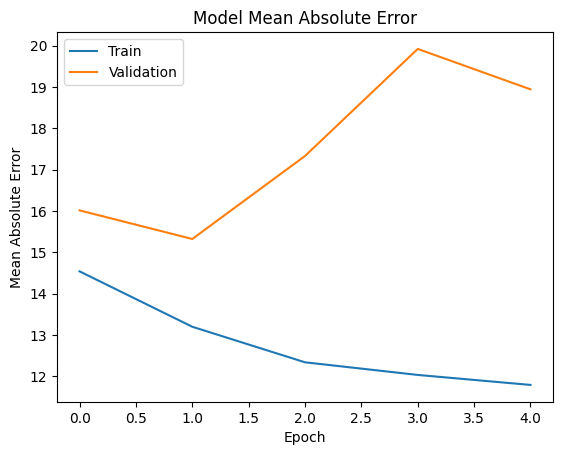

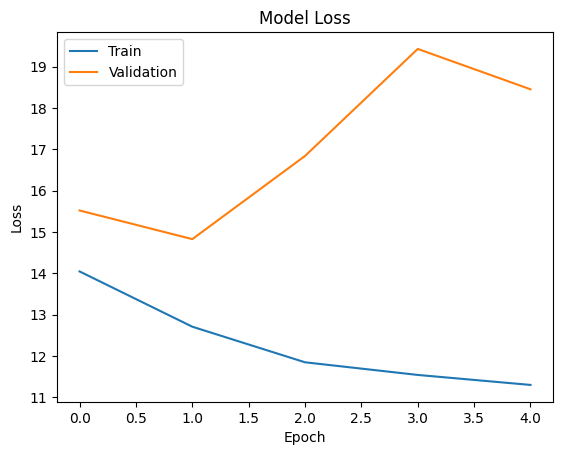

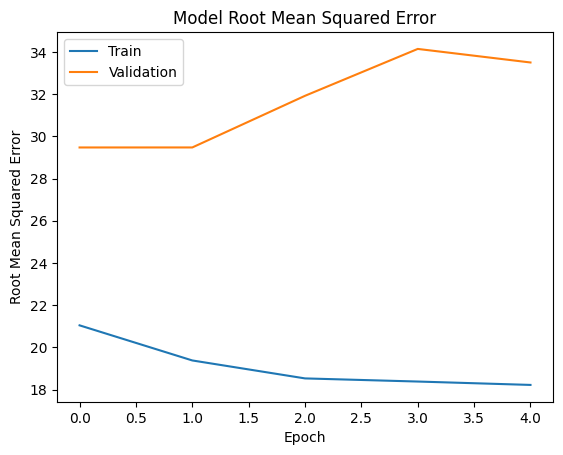

In [32]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Root Mean Squared Error')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Inference

In [36]:
klasifikasi_perkara_encoded = 2
penuntut_umum_encoded = 9
hakim_encoded = 3
jumlah_saksi_inference = 3
maks_lama_penjara_berdasarkan_pasal = 84

inference_text = "1 (satu) unit sepeda motor yang sudah dimodifikasi (cetul) tanpa terpasang nomor registrasi / nomor polisi dan tidak dapat terdapat nomor rangka dan nomor mesin kendaraan Dikembalikan kepada I Gede Wiraguna 1 (satu) unit sepeda motor merek Kawasaki tipe LX 150 C, warna hitam kombinasi kuning, tahun pembuatan 2010, tanpa terpasang nomor registrasi / nomor polisi, Noka MH4LX150CAKP15705, Nosin LX150CEP19759 1 (satu) lembar SNTK sepeda motor merek Kawasaki tipe LX 150 C, warna hijau, tahun pembuatan 2010, nomor registrasi / nomor polisi DK 8164 IQ, Noka MH4LX150CAKP15705, Nosin LX150CEP19759, a.n. Chrisnawati, alamat Jl. Surabaya D, 6/20 Puri Gading, Jimbaran, Kuta Badung dan 1 (satu) buah buku BPKB, No H-0 2625520, DK 8164 IQ, merek Kawasaki tipe LX 150 C, Noka MH4LX150CAKP15705, Nosin LX150CEP19759, a.n. Chrisnawati, alamat Jl. Surabaya D, 6/20 Puri Gading, Jimbaran, Kuta Badung Dikembalikan kepada I Wayan Eva Kusuma Putra 6. Membebankan kepada Para Terdakwa membayar biaya perkara masing-masing sejumlah Rp5.000,00 (lima ribu rupiah) Terdakwa I, Rifqi Abdurahman, dan Terdakwa II, Gunawan, didakwa melakukan pencurian sepeda motor Kawasaki KLX 150 C di Jalan Raya Kayuambua, Bangli, pada 11 Desember 2022, sekitar pukul 00.30 WITA. Berawal dari permintaan Gunawan untuk mencarikan motor KLX, mereka berdua berangkat dari Denpasar ke Kintamani. Di lokasi kejadian, mereka melihat motor KLX tanpa kunci kontak. Rifqi mengambil motor tersebut dengan mendorongnya, sementara Gunawan mengawasi.  Karena Rifqi tidak bisa menyalakan motor, Gunawan membantu mendorongnya. Namun, motor mereka mengalami kerusakan, dan Rifqi melanjutkan mendorong motor curian sendirian. Saat mendorong, Rifqi bertemu saksi-saksi yang curiga dan menghubungi pemilik motor. Rifqi berhasil menyalakan motor, tetapi kehabisan bensin. Ia melanjutkan mendorong ke SPBU Sekardadi, di mana ia tertidur dan ditangkap polisi.  Gunawan ditangkap di Desa Dumilih. Motor curian dan motor yang digunakan para terdakwa disita. Korban, I Wayan Eva Kusuma Putra, mengalami kerugian Rp16.000.000. Para terdakwa didakwa melanggar Pasal 363 Ayat (1) Ke 4 KUHP sebagai dakwaan primair dan Pasal 362 KUHP sebagai dakwaan subsidair. RIFQI ABDURAHMAN"
inference_numerical_tensor = tf.constant([[klasifikasi_perkara_encoded, penuntut_umum_encoded, hakim_encoded, jumlah_saksi_inference, maks_lama_penjara_berdasarkan_pasal]], dtype=tf.float32)
inputs = tokenizer(inference_text, padding=True, truncation=True, return_tensors='tf', max_length=512)

input_dict = {
    'input_ids': inputs['input_ids'],
    'attention_mask': inputs['attention_mask'],
    'numerical_feature': inference_numerical_tensor
}

In [37]:
predictions = model(input_dict)
predictions_np = predictions.numpy()

print(predictions_np)


[[7.0083885]]


In [22]:
model.save('../Model/BERT_NO_PASAL_NO_BARANG_BUKTI')

INFO:tensorflow:Assets written to: ../Model/BERT_NO_PASAL_NO_BARANG_BUKTI\assets


INFO:tensorflow:Assets written to: ../Model/BERT_NO_PASAL_NO_BARANG_BUKTI\assets


## Saved Model Inference

In [32]:
tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")

class BERTRegressor(tf.keras.Model):
    def __init__(self):
        super(BERTRegressor, self).__init__()
        self.bert = TFBertModel.from_pretrained("indolem/indobert-base-uncased", from_pt=True)
        for layer in self.bert.layers:
            layer.trainable = False
        self.regressor = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_ids = inputs['input_ids']
        attention_mask = inputs['attention_mask']
        numerical_features = inputs['numerical_feature']

        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = bert_output.pooler_output
        combined_output = tf.concat([pooled_output, numerical_features], axis=1)

        return self.regressor(combined_output)

loaded_model = tf.keras.models.load_model('../Model/dummy_run_BERT_2', custom_objects={'BERTRegressor': BERTRegressor})

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predict

In [33]:
klasifikasi_perkara_encoded = 2
penuntut_umum_encoded = 9
hakim_encoded = 3
jumlah_saksi_inference = 3
maks_lama_penjara_berdasarkan_pasal = 84

inference_text = "1 (satu) unit sepeda motor yang sudah dimodifikasi (cetul) tanpa terpasang nomor registrasi / nomor polisi dan tidak dapat terdapat nomor rangka dan nomor mesin kendaraan Dikembalikan kepada I Gede Wiraguna 1 (satu) unit sepeda motor merek Kawasaki tipe LX 150 C, warna hitam kombinasi kuning, tahun pembuatan 2010, tanpa terpasang nomor registrasi / nomor polisi, Noka MH4LX150CAKP15705, Nosin LX150CEP19759 1 (satu) lembar SNTK sepeda motor merek Kawasaki tipe LX 150 C, warna hijau, tahun pembuatan 2010, nomor registrasi / nomor polisi DK 8164 IQ, Noka MH4LX150CAKP15705, Nosin LX150CEP19759, a.n. Chrisnawati, alamat Jl. Surabaya D, 6/20 Puri Gading, Jimbaran, Kuta Badung dan 1 (satu) buah buku BPKB, No H-0 2625520, DK 8164 IQ, merek Kawasaki tipe LX 150 C, Noka MH4LX150CAKP15705, Nosin LX150CEP19759, a.n. Chrisnawati, alamat Jl. Surabaya D, 6/20 Puri Gading, Jimbaran, Kuta Badung Dikembalikan kepada I Wayan Eva Kusuma Putra 6. Membebankan kepada Para Terdakwa membayar biaya perkara masing-masing sejumlah Rp5.000,00 (lima ribu rupiah) Terdakwa I, Rifqi Abdurahman, dan Terdakwa II, Gunawan, didakwa melakukan pencurian sepeda motor Kawasaki KLX 150 C di Jalan Raya Kayuambua, Bangli, pada 11 Desember 2022, sekitar pukul 00.30 WITA. Berawal dari permintaan Gunawan untuk mencarikan motor KLX, mereka berdua berangkat dari Denpasar ke Kintamani. Di lokasi kejadian, mereka melihat motor KLX tanpa kunci kontak. Rifqi mengambil motor tersebut dengan mendorongnya, sementara Gunawan mengawasi.  Karena Rifqi tidak bisa menyalakan motor, Gunawan membantu mendorongnya. Namun, motor mereka mengalami kerusakan, dan Rifqi melanjutkan mendorong motor curian sendirian. Saat mendorong, Rifqi bertemu saksi-saksi yang curiga dan menghubungi pemilik motor. Rifqi berhasil menyalakan motor, tetapi kehabisan bensin. Ia melanjutkan mendorong ke SPBU Sekardadi, di mana ia tertidur dan ditangkap polisi.  Gunawan ditangkap di Desa Dumilih. Motor curian dan motor yang digunakan para terdakwa disita. Korban, I Wayan Eva Kusuma Putra, mengalami kerugian Rp16.000.000. Para terdakwa didakwa melanggar Pasal 363 Ayat (1) Ke 4 KUHP sebagai dakwaan primair dan Pasal 362 KUHP sebagai dakwaan subsidair. RIFQI ABDURAHMAN"
inference_numerical_tensor = tf.constant([[klasifikasi_perkara_encoded, penuntut_umum_encoded, hakim_encoded, jumlah_saksi_inference, maks_lama_penjara_berdasarkan_pasal]], dtype=tf.float32)
inputs = tokenizer(inference_text, padding=True, truncation=True, return_tensors='tf', max_length=512)

input_dict = {
    'input_ids': inputs['input_ids'],
    'attention_mask': inputs['attention_mask'],
    'numerical_feature': inference_numerical_tensor
}

In [34]:
predictions = loaded_model(input_dict)
predictions_np = predictions.numpy()

print(predictions)
print(predictions_np)
print(predictions_np[0][0])


tf.Tensor([[15.147672]], shape=(1, 1), dtype=float32)
[[15.147672]]
15.147672
